<a href="https://colab.research.google.com/github/DABallentine/knowledge_discovery_charlotte/blob/Imad/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 311-Calls Clustering

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Function to read data from URL
def read_data_from_URL(url):
    df=pd.read_csv(url)
    return df

# Prepare Backup

In [3]:
# Backup Copy
serv_req_url='https://bitbucket.org/nthammad-uncc/knowledge_discovery_charlotte/raw/main/data/merged_requests.zip'
backup = read_data_from_URL(serv_req_url)

In [4]:
# Drop unneeded columns
backup.drop(columns=['Unnamed: 0', 'OBJECTID', 'DEPARTMENT', 'REQUEST_NO', 
                       'REQUEST_TYPE', 'RECEIVED_DATE', 'RECEIVED_MONTH', 'RECEIVED_YEAR', 
                       'SEASON', 'INTERNAL_FIELD_OBSERVATION', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 
                       'RECEIVED_DAY', 'ADDRESS_ID', 'EMPLOYED_All', 'PERCENT EMPLOYED_Not in labor force',
                       'PERCENT EMPLOYED_Female Only', 'COMMUTING TO WORK_All', 'PERCENT COMMUTING TO WORK_By Car',
                       'PERCENT COMMUTING TO WORK_Public transportation', 'PERCENT COMMUTING TO WORK_Walk', 
                       'PERCENT COMMUTING TO WORK_Other', 'PERCENT COMMUTING TO WORK_Worked at home', 
                       'INCOME AND BENEFITS_Total households', 'PERCENT HOUSEHOLD INCOME_Retired Householders'], inplace=True)

In [5]:
backup.head()

REQUEST_CAT  ...  HISTORIC_REDLINING
0      NON_RECYCLABLE ITEMS  ...                 NaN
1  UTILITY VERIFICATION LTR  ...                 NaN
2      NON_RECYCLABLE ITEMS  ...                 NaN
3            MISSED SERVICE  ...                 NaN
4                       CWP  ...                   Y

[5 rows x 19 columns]

In [6]:
# Drop NA's
backup = backup.dropna()

In [7]:
backup.shape

(161310, 19)

# The above 'backup' dataframe will be used to 
<br> (1) merge our 'labled' clusters (once we have run clustering)
<br> (2) plot the clusters

# Below: I am importing our 311 Dataset - will use this dataframe to cluster.

In [8]:
# Read in Naomi's merged, preprocessed data
serv_req_url='https://bitbucket.org/nthammad-uncc/knowledge_discovery_charlotte/raw/main/data/merged_requests.zip'
requests = read_data_from_URL(serv_req_url)
requests.head()

Unnamed: 0  OBJECTID  ... PERCENTAGE BELOW POVERTY LEVEL_All  HISTORIC_REDLINING
0           0         1  ...                           7.135714                 NaN
1           1         2  ...                           8.050000                 NaN
2           2         3  ...                          25.811765                 NaN
3           3         4  ...                          16.960000                 NaN
4           4         6  ...                          20.682353                   Y

[5 rows x 45 columns]

# **Set up the Requests Data Frame for Clustering**
## (1) Remove unwanted columns: like 'Department', 'Request_Type' <- We dont want our clustering to be biased.

## (2) Keep columns with numerical data

In [9]:
# Drop categorical columns 
requests.drop(columns=['Unnamed: 0', 'OBJECTID', 'DEPARTMENT', 'REQUEST_NO', 
                       'REQUEST_TYPE', 'RECEIVED_DATE', 'RECEIVED_MONTH', 'RECEIVED_YEAR', 
                       'SEASON', 'INTERNAL_FIELD_OBSERVATION', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 
                       'RECEIVED_DAY', 'ADDRESS_ID', 'EMPLOYED_All', 'PERCENT EMPLOYED_Not in labor force',
                       'PERCENT EMPLOYED_Female Only', 'COMMUTING TO WORK_All', 'PERCENT COMMUTING TO WORK_By Car',
                       'PERCENT COMMUTING TO WORK_Public transportation', 'PERCENT COMMUTING TO WORK_Walk', 
                       'PERCENT COMMUTING TO WORK_Other', 'PERCENT COMMUTING TO WORK_Worked at home', 
                       'INCOME AND BENEFITS_Total households', 'PERCENT HOUSEHOLD INCOME_Retired Householders'], inplace=True)




In [10]:
requests.head()

REQUEST_CAT  ...  HISTORIC_REDLINING
0      NON_RECYCLABLE ITEMS  ...                 NaN
1  UTILITY VERIFICATION LTR  ...                 NaN
2      NON_RECYCLABLE ITEMS  ...                 NaN
3            MISSED SERVICE  ...                 NaN
4                       CWP  ...                   Y

[5 rows x 19 columns]

## Removing: Block_NO, Neighborhood_Profile_Area because the clustering might be biased towards 'areas' with higher counts?

In [11]:
# Drop the other columns 11-16
requests.drop(requests.columns[[11, 12, 13, 14, 15, 16]], axis = 1, inplace = True)

In [12]:
requests.head()

REQUEST_CAT  ...  HISTORIC_REDLINING
0      NON_RECYCLABLE ITEMS  ...                 NaN
1  UTILITY VERIFICATION LTR  ...                 NaN
2      NON_RECYCLABLE ITEMS  ...                 NaN
3            MISSED SERVICE  ...                 NaN
4                       CWP  ...                   Y

[5 rows x 13 columns]

# Cont. removing columns

In [13]:
# Drop the other columns 0-3
requests.drop(requests.columns[[0, 1, 2, 3, 4]], axis = 1, inplace = True)

In [14]:
requests.head()

TOTAL_CALLS  ...  HISTORIC_REDLINING
0           15  ...                 NaN
1           10  ...                 NaN
2            7  ...                 NaN
3           21  ...                 NaN
4            7  ...                   Y

[5 rows x 8 columns]

# We have chosen to cluster with only numerical data.

# The columns left are all numeric (except Redlining)

# Need to Standardize the Total_Calls column

In [15]:
# Need to standardize Total_Calls
from sklearn.preprocessing import StandardScaler
requests[['TOTAL_CALLS']] = StandardScaler().fit_transform(requests[['TOTAL_CALLS']])


In [16]:
requests.head() 

TOTAL_CALLS  ...  HISTORIC_REDLINING
0    -0.158456  ...                 NaN
1    -0.270466  ...                 NaN
2    -0.337671  ...                 NaN
3    -0.024045  ...                 NaN
4    -0.337671  ...                   Y

[5 rows x 8 columns]

In [17]:
# Drop NA's
requests = requests.dropna()

In [18]:
requests.shape

(161310, 8)

# KPROTOTYPES Clustering
## This will allow us to use Categorical Data in our Clustering (since I am including redlining at a binary variable, we will have to use the K Prototypes package for clustering)

In [19]:
# Install kmodes
! pip install kmodes
 

In [20]:
from kmodes.kprototypes import KPrototypes 

In [21]:
# Step 1: Covert df into a numpy array
df_array = requests.values 

In [22]:
# Step 2: Define which columns are supposed to be numeric
df_array[:, 0] = df_array[:, 0].astype(float) 
df_array[:, 1] = df_array[:, 1].astype(float) 
df_array[:, 2] = df_array[:, 2].astype(float) 
df_array[:, 3] = df_array[:, 3].astype(float) 
df_array[:, 4] = df_array[:, 4].astype(float) 
df_array[:, 5] = df_array[:, 5].astype(float) 
df_array[:, 6] = df_array[:, 6].astype(float) 



In [23]:
# Step 3: Setup the model

kproto = KPrototypes(n_clusters = 5,
                     max_iter = 5)

clusters = kproto.fit_predict(df_array, categorical = [7])

In [24]:
# Print Clusters
print(kproto.cluster_centroids_)

[['-0.06075102472840782' '0.004709079015331157' '0.69883433762549'
  '0.46770095511914667' '0.4583821932705987' '0.07391685161004091'
  '22.06769931004145' 'Y']
 ['0.16583608161104654' '0.006879101923340251' '0.7764165771842624'
  '0.22268759002640157' '0.5159900526402122' '0.26132235733283543'
  '11.364899011865122' 'Y']
 ['-0.010917421298379961' '0.004570106813741336' '0.6985493257584539'
  '0.34110842125719815' '0.5457201884640895' '0.1131713902786807'
  '14.727206168830993' 'R']
 ['-0.1907134955137639' '0.008331227392555644' '0.7523239535967584'
  '0.18580209061794087' '0.49647194321643084' '0.3177259661657341'
  '9.185479014188578' 'B']
 ['-0.014351963411199998' '0.0027842112272884476' '0.7399712709853511'
  '0.4098221116541448' '0.5154518562626194' '0.07472603208298645'
  '18.009718540769615' 'Y']]


# We have our Clusters - Now we can add these values back to our 'Backup' dataframe

In [25]:
# Attach Clusters to the Backup DF

cluster_dict = []
for c in clusters:
  cluster_dict.append(c)

In [27]:
# Assign Cluster Dictionary Back to Original DF
backup['cluster'] = cluster_dict

In [28]:
# Double check if we have added clusters to the original data
backup.head()

REQUEST_CAT  ...  cluster
4                         CWP  ...        0
19       NON_RECYCLABLE ITEMS  ...        4
64                 BULKY ITEM  ...        4
68                      TIRES  ...        4
81  WEATHER AND ENVIRONMENTAL  ...        2

[5 rows x 20 columns]

In [29]:
# Take a look at Cluster 0
c_0 = backup[backup['cluster'] == 0]
c_0.head(10)

REQUEST_CAT  ...  cluster
4                          CWP  ...        0
106  WEATHER AND ENVIRONMENTAL  ...        0
111       NON_RECYCLABLE ITEMS  ...        0
273       NON_RECYCLABLE ITEMS  ...        0
293           RECYCLABLE ITEMS  ...        0
315                 BULKY ITEM  ...        0
357                       CART  ...        0
372       NON_RECYCLABLE ITEMS  ...        0
376       NON_RECYCLABLE ITEMS  ...        0
384           RECYCLABLE ITEMS  ...        0

[10 rows x 20 columns]

In [30]:
# Take a look at Cluster 1
c_1 = backup[backup['cluster'] == 1]
c_1.head(10)

REQUEST_CAT  ...  cluster
118              RECYCLING  ...        1
174   NON_RECYCLABLE ITEMS  ...        1
225         TRANSPORTATION  ...        1
280   NON_RECYCLABLE ITEMS  ...        1
524   NON_RECYCLABLE ITEMS  ...        1
571       RECYCLABLE ITEMS  ...        1
782   NON_RECYCLABLE ITEMS  ...        1
1031  NON_RECYCLABLE ITEMS  ...        1
1186  NON_RECYCLABLE ITEMS  ...        1
1217        MISSED SERVICE  ...        1

[10 rows x 20 columns]

In [31]:
# Cluster 2 Data
c_2 = backup[backup['cluster'] == 2]

In [32]:
# Cluster 3 Data
c_3 = backup[backup['cluster'] == 3]

In [33]:
# Cluster 4 Data
c_4 = backup[backup['cluster'] == 4]

# Visualize Clusters on our ShapeFile

In [34]:
! pip install geopandas
import geopandas as gpd

! pip install contextily
import contextily as ctx


     |████████████████████████████████| 1.0 MB 31.3 MB/s 
     |████████████████████████████████| 6.3 MB 40.4 MB/s 
     |████████████████████████████████| 15.4 MB 44.2 MB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [35]:
# mount and connect my drive to access shape files 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [36]:
# IMPORT SHAPE FILE FOR MAPPING
npa_map = gpd.read_file('/content/gdrive/MyDrive/Charlotte 311 Calls Project/Data/NPA/npa.shp')

# Layers into a web mercator projection
# reproject to web mercator
npa_map = npa_map.to_crs(epsg=4326)

In [37]:
# Turn our Backup Data Frame into a GeoPandas Data Frame

geo_requests = gpd.GeoDataFrame(backup, 
                                crs = 'EPSG:4326',
                                geometry = gpd.points_from_xy(backup.LONGITUDE, 
                                                              backup.LATITUDE))

In [38]:
# Confirm reproject to CRS = EPSG 4326 (Map with Long/Lat)
geo_requests = geo_requests.to_crs(epsg=4326)

In [39]:
# convert lat/lon to floats
geo_requests.LONGITUDE = geo_requests.LONGITUDE.astype('float')
geo_requests.LATITUDE = geo_requests.LATITUDE.astype('float')

In [40]:
# drop the unmapped rows - anything that has a longitude of 0 should be removed
geo_requests = geo_requests[geo_requests.LONGITUDE!=0]
geo_requests = geo_requests[geo_requests.LATITUDE!=0]

In [41]:
# get the bounding box coordinates for the 311 calls data
minx, miny, maxx, maxy = geo_requests.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-85.56829116
-80.77474209
35.16855221
35.27547993


In [42]:
# get the bounding box coordinates for the SHAPE FILE calls data
minx, miny, maxx, maxy = npa_map.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-81.05802900022775
-80.55029699963121
35.00171000120846
35.51510300167768


In [43]:
# Filter Cluster Data 

# Cluster 0
cluster0 = geo_requests[geo_requests['cluster'] == 0]

# Cluster 1
cluster1 = geo_requests[geo_requests['cluster'] == 1]

# Cluster 2
cluster2 = geo_requests[geo_requests['cluster'] == 2]

# Cluster 3
cluster3 = geo_requests[geo_requests['cluster'] == 3]

# Cluster 4
cluster4 = geo_requests[geo_requests['cluster'] == 4]

In [73]:
geo_requests.head()

REQUEST_CAT  ...  cluster1
4                         CWP  ...         2
19       NON_RECYCLABLE ITEMS  ...         2
64                 BULKY ITEM  ...         4
68                      TIRES  ...         4
81  WEATHER AND ENVIRONMENTAL  ...         2

[5 rows x 22 columns]

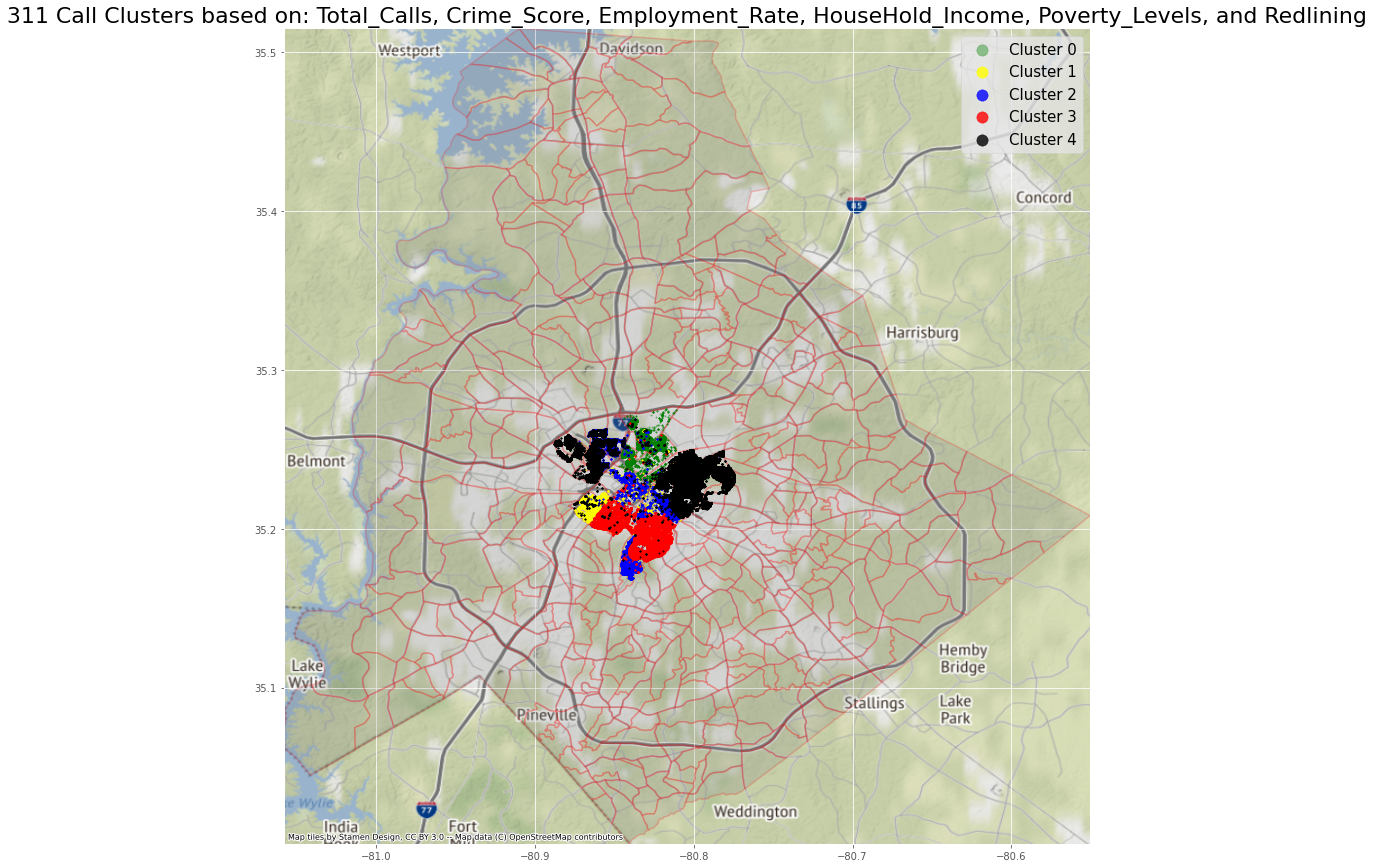

In [44]:
# Plot Clusters
fig, ax = plt.subplots(figsize=(15,15))

# Plots 1: Background Map
npa_map.plot(ax=ax,
             color='grey', 
             edgecolor='red',
             lw=1.5,
             alpha=0.2)

# Plot 2: Cluster Zero
cluster0.plot(ax=ax, 
              color='green',
              markersize=2,
              alpha=0.4,
              label = 'Cluster 0')

# Plot 3: Cluster One
cluster1.plot(ax=ax, 
              color='yellow',
              markersize=2,
              alpha=0.8,
              label = 'Cluster 1')

# Plot 4: Cluster Two
cluster2.plot(ax=ax, 
              color='blue',
              markersize=2,
              alpha=0.8,
              label = 'Cluster 2')

# Plot 5: Cluster Three
cluster3.plot(ax=ax, 
              color='red',
              markersize=2,
              alpha=0.8,
              label = 'Cluster 3')

# Plot 6: Cluster Four
cluster4.plot(ax=ax, 
              color='black',
              markersize=2,
              alpha=0.8,
              label = 'Cluster 4')

plt.legend(markerscale = 8,
           prop={'size': 15})

# Use the bouding coordinates to set the x and y limits
ax.set_xlim(minx, maxx) 
ax.set_ylim(miny, maxy)

# no axis
# ax.axis('off')
ax.set_title('311 Call Clusters based on: Total_Calls, Crime_Score, Employment_Rate, HouseHold_Income, Poverty_Levels, and Redlining',fontsize=22)

# add a basemap
ctx.add_basemap(ax, crs = npa_map.crs.to_string())

# How do the above clusters compare with Redline areas

In [74]:
# Redline Areas

redline_yes = geo_requests.loc[(geo_requests['HISTORIC_REDLINING'] == 'Y')]

redline_no = geo_requests.loc[(geo_requests['HISTORIC_REDLINING'] == 'N')]

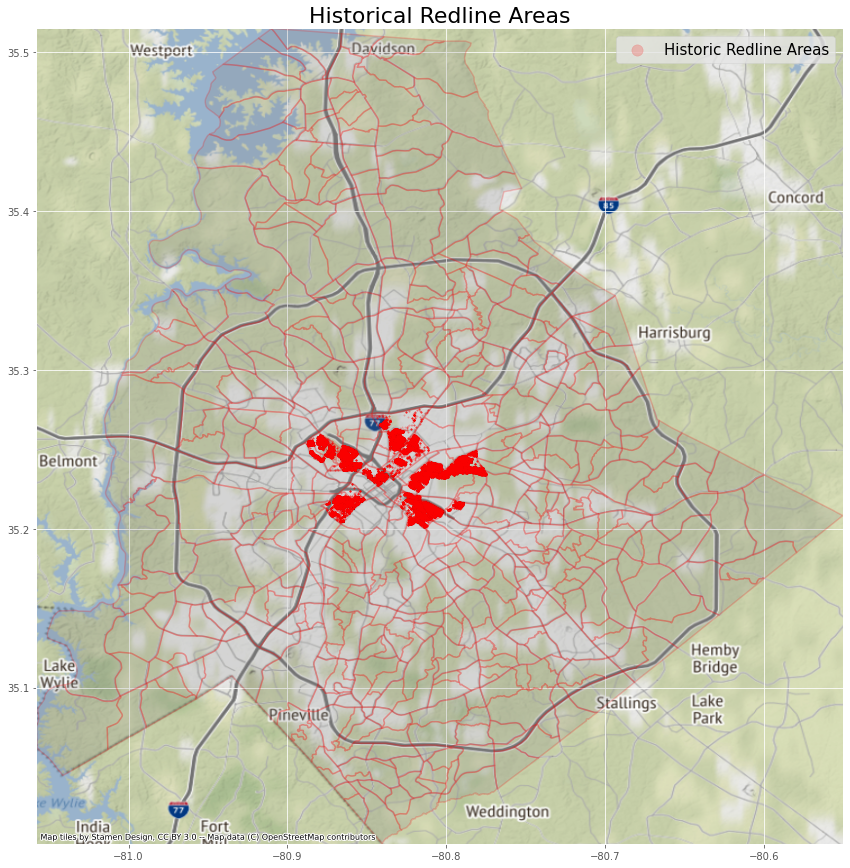

In [75]:
# Redlining Map

# Plot Redline Areas
fig, ax = plt.subplots(figsize=(15,15))

# Plots 1: Background Map
npa_map.plot(ax=ax,
             color='grey', 
             edgecolor='red',
             lw=1.5,
             alpha=0.2)

# Plot 2: Redline = Y
redline_yes.plot(ax=ax, 
              color='red',
              markersize=2,
              alpha=0.2,
              label = 'Historic Redline Areas')

# Plot 3: Redline = N
# redline_no.plot(ax=ax, 
#              color='blue',
#              markersize=2,
#              alpha=0.2,
#              label = 'Not Redline Areas')


plt.legend(markerscale = 8,
           prop={'size': 15})

# Use the bouding coordinates to set the x and y limits
ax.set_xlim(minx, maxx) 
ax.set_ylim(miny, maxy)

# no axis
# ax.axis('off')
ax.set_title('Historical Redline Areas',fontsize=22)

# add a basemap
ctx.add_basemap(ax, crs = npa_map.crs.to_string())

# WHAT IF 
# WE Cluster based only on TOTAL_CALLS

In [45]:
# Create New Requests DF
serv_req_url='https://bitbucket.org/nthammad-uncc/knowledge_discovery_charlotte/raw/main/data/merged_requests.zip'
requests1 = read_data_from_URL(serv_req_url)

In [46]:
# Drop NA's
requests1 = requests1.dropna()

In [47]:
# Remove all columns except Total_Calls
total_calls_subset = requests1[['TOTAL_CALLS']]

In [48]:
total_calls_subset.head()

TOTAL_CALLS
4             7
19            5
64           18
68           18
81            2

In [49]:
# Standardize Total_Calls
from sklearn.preprocessing import StandardScaler
total_calls_subset[['TOTAL_CALLS']] = StandardScaler().fit_transform(total_calls_subset[['TOTAL_CALLS']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [50]:
# Cluster

from sklearn.cluster import KMeans

# Step 1: Covert df into a numpy array
df_array1 = total_calls_subset.values 


# Step 2: Define which columns are supposed to be numeric
df_array1[:, 0] = df_array1[:, 0].astype(float) 

# Step 3: Setup the model
kmeans = KMeans(init="random",
                n_clusters = 5,
                n_init = 10,
                max_iter = 20,
                random_state=42
                )

clusters = kmeans.fit_predict(df_array1)


In [51]:
# Cluster Centeroids
kmeans.cluster_centers_

array([[ 2.82384169e+00],
       [ 8.98211057e-01],
       [-3.68020869e-01],
       [ 5.84694569e+00],
       [-4.86843188e-03]])

In [52]:
# Create a Cluster Dictionary
cluster_dict1 = []
for c in clusters:
  cluster_dict1.append(c)

In [53]:
# Add these cluster dictionary back to georequests ---> as 'cluster 1' which will stand for 'clusters based on total_calls'
geo_requests['cluster1'] = cluster_dict1

In [54]:
geo_requests.head()

REQUEST_CAT  ...  cluster1
4                         CWP  ...         2
19       NON_RECYCLABLE ITEMS  ...         2
64                 BULKY ITEM  ...         4
68                      TIRES  ...         4
81  WEATHER AND ENVIRONMENTAL  ...         2

[5 rows x 22 columns]

In [55]:
# Filter 'Cluster1' Data
# tc stats for total_calls

# Cluster 0
tc_cluster0 = geo_requests[geo_requests['cluster1'] == 0]

# Cluster 1
tc_cluster1 = geo_requests[geo_requests['cluster1'] == 1]

# Cluster 2
tc_cluster2 = geo_requests[geo_requests['cluster1'] == 2]

# Cluster 3
tc_cluster3 = geo_requests[geo_requests['cluster1'] == 3]

# Cluster 4
tc_cluster4 = geo_requests[geo_requests['cluster1'] == 4]

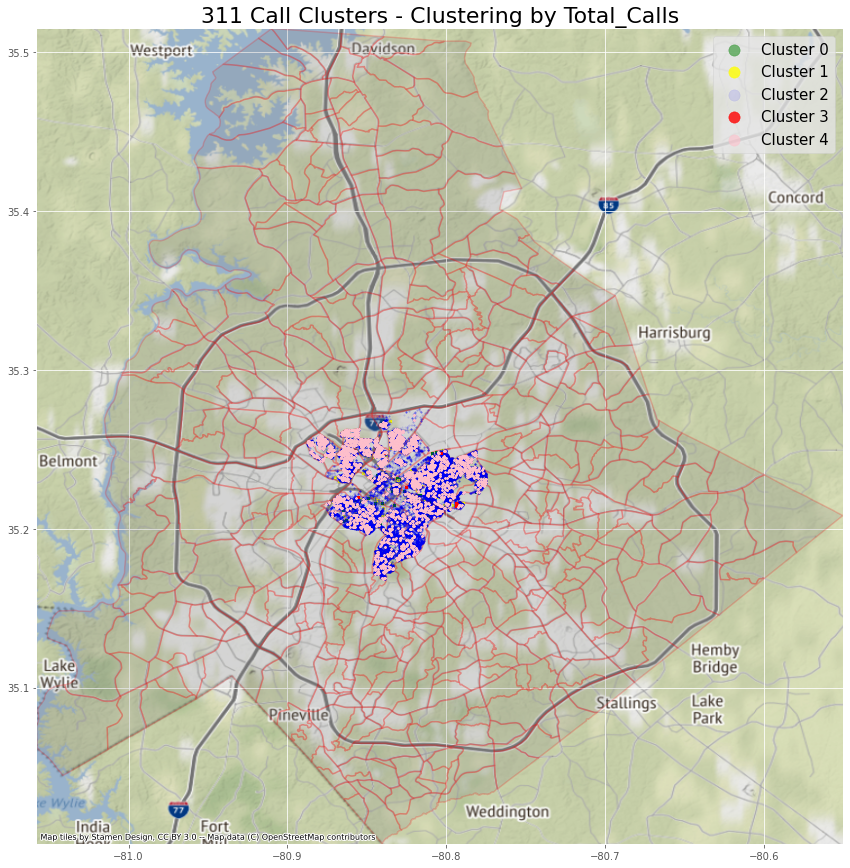

In [72]:
# Plot Clusters based on Total_Calls
fig, ax = plt.subplots(figsize=(15,15))

# Plots 1: Background Map
npa_map.plot(ax=ax,
             color='grey', 
             edgecolor='red',
             lw=1.5,
             alpha=0.2)

# Plot 2: Cluster Zero
tc_cluster0.plot(ax=ax, 
                  color='green',
                  markersize=2,
                  alpha=0.5,
                  label = 'Cluster 0')

# Plot 3: Cluster One
tc_cluster1.plot(ax=ax, 
                  color='yellow',
                  markersize=2,
                  alpha=0.8,
                  label = 'Cluster 1')

# Plot 4: Cluster Two
tc_cluster2.plot(ax=ax, 
                  color='blue',
                  markersize=2,
                  alpha=0.1,
                  label = 'Cluster 2')

# Plot 5: Cluster Three
tc_cluster3.plot(ax=ax, 
                  color='red',
                  markersize=2,
                  alpha=0.8,
                  label = 'Cluster 3')

# Plot 6: Cluster Four
tc_cluster4.plot(ax=ax, 
                  color='pink',
                  markersize=2,
                  alpha=0.6,
                  label = 'Cluster 4')

plt.legend(markerscale = 8,
           prop={'size': 15})

# Use the bouding coordinates to set the x and y limits
ax.set_xlim(minx, maxx) 
ax.set_ylim(miny, maxy)

# no axis
# ax.axis('off')
ax.set_title('311 Call Clusters - Clustering by Total_Calls',fontsize=22)

# add a basemap
ctx.add_basemap(ax, crs = npa_map.crs.to_string())